In [25]:
# Author: Hussain Abbas, MSc
# © 2021 Stats AI LLC 
# All Rights Reserved

import pandas as pd
import numpy as np
import yfinance as yf

In [26]:
# download csv from NASDAQ Stock Screener
# https://www.nasdaq.com/market-activity/stocks/screener

df = pd.read_csv('C:/Users/deepl/Desktop/Algo Trading/nasdaq_screener_1620941096399.csv')

# rename colummns to give better names
df.columns = ['symbol', 'name', 'last_sale', 'net_change', 'pct_change', 'market_cap', 'country',
             'ipo_year', 'volume', 'sector', 'industry']

# strip dollar signs from numeric fields
df['last_sale'] = df['last_sale'].replace('[\$,]', '', regex=True).astype(float)

df.head()

,symbol,name,last_sale,net_change,pct_change,market_cap,country,ipo_year,volume,sector,industry
0,A,Agilent Technologies Inc. Common Stock,130.02,1.38,1.073%,3.961677e+10,United States,1999.0,800434,Capital Goods,Electrical Products
1,AA,Alcoa Corporation Common Stock,39.13,-0.38,-0.962%,7.306539e+09,NaN,2016.0,6477184,Basic Industries,Metal Fabrications
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,9.79,-0.09,-0.911%,1.223872e+09,NaN,2021.0,377125,Finance,Business Services
3,AACG,ATA Creativity Global American Depositary Shares,2.61,-0.13,-4.745%,8.274010e+07,China,NaN,40704,Miscellaneous,Service to the Health Industry
4,AACQ,Artius Acquisition Inc. Class A Common Stock,9.86,0.01,0.102%,8.929462e+08,United States,2020.0,1992568,Finance,Business Services


In [27]:
df_cheap_stocks = df[df.last_sale <= 50].sort_values(by=['last_sale'], ascending=False)

df_cheap_stocks.head(20)

,symbol,name,last_sale,net_change,pct_change,market_cap,country,ipo_year,volume,sector,industry
6076,RUSHA,Rush Enterprises Inc. Common Stock Cl A,49.96,2.06,4.301%,2.776598e+09,United States,NaN,204817,Consumer Services,Other Specialty Stores
1790,CSU,Capital Senior Living Corporation Common Stock,49.96,3.20,6.843%,1.057894e+08,United States,1997.0,34282,Health Care,Hospital/Nursing Management
1259,CASH,Meta Financial Group Inc. Common Stock,49.95,1.72,3.566%,1.594663e+09,United States,1993.0,129267,Finance,Banks
167,AEPPL,American Electric Power Company Inc. Corporate...,49.92,0.65,1.319%,0.000000e+00,United States,NaN,22624,Public Utilities,Electric Utilities: Central
4278,LPSN,LivePerson Inc. Common Stock,49.90,0.21,0.423%,3.440784e+09,United States,2000.0,985208,Technology,EDP Services
489,APP,Applovin Corporation Class A Common Stock,49.87,-2.38,-4.555%,1.785123e+10,United States,2021.0,1645304,Technology,EDP Services
3551,IBOC,International Bancshares Corporation Common Stock,49.84,1.84,3.833%,3.157848e+09,United States,NaN,251009,Finance,Major Banks
1732,CRH,CRH PLC American Depositary Shares,49.79,0.43,0.871%,3.906741e+10,Ireland,NaN,561845,Capital Goods,Building Materials
4812,NCNO,nCino Inc. Common Stock,49.76,-1.27,-2.489%,4.695726e+09,United States,2020.0,2851061,Technology,Computer Software: Prepackaged Software
2239,EFSC,Enterprise Financial Services Corporation Comm...,49.73,1.73,3.604%,1.554534e+09,United States,NaN,134309,Finance,Major Banks


In [28]:
# We are going to select CFG since it is a cheap stock for a major bank with a high dividend yield. 
# Since banks have an implicit bailout and have a natural customer demand, these factors 
# place upward pressure on the stock. 

# We assume we have 100k starting capital
pf_value = 100000

sym = 'CFG'

buy_price = df[df['symbol'] == sym].last_sale
buy_price = buy_price.values[0]

num_shares = int((pf_value / buy_price) // 100 * 100)

num_contracts = int(num_shares / 100)

display(num_shares)
display(num_contracts)
display(buy_price)

2000

20

49.48

In [29]:
stock = yf.Ticker(sym)

display(stock.info)

{'zip': '02903',
 'sector': 'Financial Services',
 'fullTimeEmployees': 17405,
 'longBusinessSummary': 'Citizens Financial Group, Inc. operates as the bank holding company for Citizens Bank, National Association that provides retail and commercial banking products and services in the United States. The company operates in two segments, Consumer Banking and Commercial Banking. The Consumer Banking segment offers traditional banking products and services, including checking and savings accounts, home and education loans, credit cards, business loans, mortgage and home equity lending, and unsecured product finance and personal loans, as well as wealth management and investment services to retail customers and small businesses. This segment also provides indirect auto finance for new and used vehicles through auto dealerships. The Commercial Banking segment offers various financial products and solutions, such as loans and leasing, trade finance, deposit and treasury management, cash manag

In [30]:
hist = stock.history(period="max")
display(hist.head())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-24,17.668485,19.081963,17.545217,18.966913,60450900,0.0,0
2014-09-25,18.539576,19.238098,18.449181,18.942253,8430000,0.0,0
2014-09-26,19.049092,19.205232,18.827208,19.106617,2504400,0.0,0
2014-09-29,19.016218,19.270974,18.827207,19.090179,4832600,0.0,0
2014-09-30,18.991559,19.369581,18.942250,19.246313,4103100,0.0,0


<AxesSubplot:title={'center':'Daily Closing price of CFG'}, xlabel='Date', ylabel='Price'>

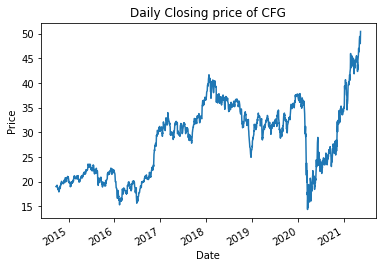

In [31]:
hist.Close.plot(title = 'Daily Closing price of ' + sym, 
                xlabel = 'Date', 
                ylabel = 'Price')

In [32]:
# get options chain

stock.options

('2021-05-21',
 '2021-06-18',
 '2021-07-16',
 '2021-10-15',
 '2022-01-21',
 '2023-01-20')

In [33]:
# get the calls for the second closest expiration

opt = stock.option_chain(stock.options[1])
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,CFG210618C00037500,2021-04-22 19:18:18,37.5,6.00,12.80,13.20,0.00,0.000000,10,0,0.626957,True,REGULAR,USD
1,CFG210618C00040000,2021-04-30 19:52:37,40.0,6.63,10.40,10.70,0.00,0.000000,4,12,0.514653,True,REGULAR,USD
2,CFG210618C00042500,2021-05-10 14:55:19,42.5,6.90,8.00,8.30,0.00,0.000000,1,40,0.447271,True,REGULAR,USD
3,CFG210618C00045000,2021-05-13 14:22:28,45.0,4.75,5.80,6.00,0.00,0.000000,52,401,0.390631,True,REGULAR,USD
4,CFG210618C00047500,2021-05-14 19:56:43,47.5,3.90,3.80,4.00,0.70,21.875002,8,794,0.364264,True,REGULAR,USD
5,CFG210618C00050000,2021-05-14 19:54:27,50.0,2.37,2.25,2.40,0.38,19.095472,4,552,0.347663,True,REGULAR,USD
6,CFG210618C00052500,2021-05-14 18:52:34,52.5,1.22,1.15,1.25,0.25,25.773195,13,429,0.332038,False,REGULAR,USD
7,CFG210618C00055000,2021-05-13 18:27:56,55.0,0.55,0.50,0.60,0.10,22.222229,4,412,0.329597,False,REGULAR,USD
8,CFG210618C00060000,2021-05-05 17:33:56,60.0,0.17,0.00,0.75,0.00,0.000000,1,6,0.548344,False,REGULAR,USD


In [34]:
# Enables us to identify the best strikes given a risk/reward profile
# In this case, we want to make money from dividends and selling calls rather than 
# upward moves in the stock. Thus, we're okay giving upside later in exchange for more call revenue today

def get_best_strikes(option_chain, buy_price, num_shares):

    holder = []
    
    for ind, values in option_chain.iterrows():

        # number of contracts we are eligible to sell based upon the number of shares we own
        num_contracts = num_shares/100
                
        # Rev is what we get when we sell the call. We get all of this if the stock expires out of the money 
        rev = values.bid * num_shares
        
        # Max Profit occurs if the stock price at expiration is higher than the strike
        max_profit = rev + (values.strike - buy_price) * num_shares
               
        # Break-even price
        buy_price - values.bid
        
        # Max Loss
        buy_price - values.bid
                      
        holder.append([num_contracts, values.bid, buy_price, 
                       values.strike, rev, max_profit, ind])
        
    holder = pd.DataFrame(holder)
    
    holder.columns = ['num_contracts', 'bid', 'buy_price', 
                      'strike_price', 'option_revenue', 
                      'max_profit', 'index']
    
    return pd.DataFrame(holder)


In [35]:
# the 47.5 strike call looks like the best return profile
# It makes 7600 if it expires out of the money and 3640 if it expires in the money.
# This gives us a return of 3,640/100,000 * 100 = 3.64% or 7.6% monthly. 
# Annualized this gives us a return of 3.6*12 = 43.2% or 7.6*12 = 91.2% which is pretty decent
# Of course, this doesn't factor in dividends, so assuming the stock never gets exercised
# we would get 7600*12 + 2000*1.56 = 91,200 + 3120 = 94,320. 94,320/100,000 = 94.32% 

get_best_strikes(opt.calls, buy_price, num_shares)

,num_contracts,bid,buy_price,strike_price,option_revenue,max_profit,index
0,20.0,12.80,49.48,37.5,25600.0,1640.0,0
1,20.0,10.40,49.48,40.0,20800.0,1840.0,1
2,20.0,8.00,49.48,42.5,16000.0,2040.0,2
3,20.0,5.80,49.48,45.0,11600.0,2640.0,3
4,20.0,3.80,49.48,47.5,7600.0,3640.0,4
5,20.0,2.25,49.48,50.0,4500.0,5540.0,5
6,20.0,1.15,49.48,52.5,2300.0,8340.0,6
7,20.0,0.50,49.48,55.0,1000.0,12040.0,7
8,20.0,0.00,49.48,60.0,0.0,21040.0,8
